In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델에 맞게 데이터 가공

x_train_norm, x_test_norm = x_train / 255.0, x_test/255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1] * x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1] * x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron

model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation = 'sigmoid', input_shape = (784,))) # 입력층 d=784, 레이어 H= 50
model.add(keras.layers.Dense(10, activation = 'softmax')) #출력층 레이어 K=10

# 모델 구성과 학습

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train_reshaped, y_train, epochs = 10)

# 모델 테스트 결과

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.4975 - accuracy: 0.8812
Epoch 2/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.2317 - accuracy: 0.9346
Epoch 3/10
1875/1875 [==============================] - 1s 782us/step - loss: 0.1821 - accuracy: 0.9489
Epoch 4/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.1519 - accuracy: 0.9572
Epoch 5/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.1311 - accuracy: 0.9633
Epoch 6/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.1156 - accuracy: 0.9683
Epoch 7/10
1875/1875 [==============================] - 1s 786us/step - loss: 0.1035 - accuracy: 0.9706
Epoch 8/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.0932 - accuracy: 0.9739
Epoch 9/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.0846 - accuracy: 0.9762
Epoch 10/10
1875/1875 [==============================] - 1s 789u

Conv2D 같은 이미지 분류에 특화된 모델을 사용하지 않아도 가장 기본적인 신경망형태인 다중 퍼셉트론만을 이용하여 더욱 간단하게 구현.

뇌속의 뉴런이 1000억개라지만 위에서 만든 모델은 굳이 Conv2D 를 사용하지 않았는데도 39,760 개의 파라미터만으로 테스트 성능이 97%에 육박하고 있다.

In [3]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [4]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화

W1 = weight_init_std * np.random.randn(input_size, hidden_size)

# 바이어스 파라미터 b를 생성하고 Zero로 초기화

b1 = np.zeros(hidden_size)
a1 = np.dot(X, W1) +b1 #은닉충 출력


print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [5]:
a1[0]

array([-0.50120586, -0.33421405,  0.9906413 ,  0.87633092, -0.20340676,
       -0.71607405,  0.14319528, -0.55338482,  1.42735114,  0.01935346,
       -0.3486795 , -0.1154462 ,  0.31895904, -0.52975189,  0.83908988,
        1.12569938, -2.01602405,  0.88303237, -0.34483075,  1.20240123,
        0.45473529,  0.2797401 ,  1.206846  , -0.79663409, -0.32704411,
       -1.09174294,  0.13924165, -0.84746096,  1.26966567, -0.48782434,
        1.8751357 ,  1.17884173, -0.23909727, -0.35211207,  0.05556479,
        0.34746726,  0.53470158,  0.12921133, -1.44716005, -2.89017923,
       -1.21854027,  0.13391244, -0.38999727, -2.22883926, -0.10460123,
       -0.99071815,  0.33413813,  0.15880629, -0.49124938, -0.81830715])

In [6]:
# Sigmoid 함수 구현

def sigmoid(x):
    return 1/ (1+np.exp(-x))

z1 = sigmoid(a1)
print(z1[0])        #sigmoid 의 출력은 모든 엘리먼트가 0에서 1사이

[0.37725733 0.41721563 0.72921457 0.70606132 0.44932292 0.32825809
 0.53573777 0.36507946 0.80648826 0.50483821 0.41370268 0.47117046
 0.57907054 0.37057476 0.6982735  0.75504436 0.11753074 0.70745021
 0.41463651 0.76895167 0.6117645  0.5694825  0.76974041 0.31074598
 0.41896001 0.25129021 0.53475428 0.29996575 0.78068551 0.38040623
 0.8670514  0.76473948 0.44050883 0.41287034 0.51388762 0.58600326
 0.63057901 0.53225796 0.19043902 0.05264118 0.22819344 0.53342817
 0.40371796 0.09719044 0.47387351 0.27077025 0.5827659  0.53961834
 0.37959929 0.30612312]


In [7]:
#단일 레이어 구현 함수

def affine_layer_forward(X,W,b):
    y =np.dot(X,W) +b
    cache = (X, W, b)
    return y, cache


input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std*np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std*np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X,W1,b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2) #z1 이 다시 두번째 레이어의 입력이됌

print(a2[0]) # 최종 출력이 output_size 만큼 벡터가됌

[-0.90959744  0.65503514  0.5077947   0.28573633  0.51663969  0.44677395
  0.33199071 -0.52759298  0.02316838  0.33841303]


In [9]:
# 최종출력인 a2 에 softmax 함수를 적용해보자. 그러면 모델의 출력은 입력 X 가 10가지 숫자 중 하나일 확률의 형태로 가공됌

def softmax(x):
    if x.ndim==2:
        x = x.T
        x = x - np.max(x, axis =0)
        y = np.exp(x) / np.sum(np.exp(x), axis = 0)
        return y.T
    
    x = x - np.max(x) #오버플로우 대책
    return np.exp(x) / np.sum(np.exp(x))

In [11]:
y_hat = softmax(a2)
y_hat[0]

array([0.03104793, 0.1484376 , 0.12811447, 0.10260286, 0.12925267,
       0.12053057, 0.10746016, 0.045492  , 0.0789092 , 0.10815253])

In [12]:
# 정답 라벨을 One-hot 인코딩하는 함수

def _change_one_hot_label (X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t # 정답라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
     # 훈련 데이터가 One-hot 벡터라면 정답 레이블의 인덱스로 반환
    
    if t.size == y.size:
        t = t.argmax(axis =1)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss
        

2.3776196871580004

In [15]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.00620959,  0.02968752,  0.02562289,  0.02052057,  0.02585053,
        -0.17589389,  0.02149203,  0.0090984 ,  0.01578184,  0.02163051],
       [-0.19409704,  0.0274832 ,  0.02708296,  0.01976781,  0.03174374,
         0.02181044,  0.01988723,  0.0080726 ,  0.01561451,  0.02263455],
       [ 0.00604094,  0.0263846 ,  0.02798451,  0.02260798, -0.18021132,
         0.01889301,  0.02266072,  0.00930526,  0.02011263,  0.02622166],
       [ 0.00673061, -0.17015387,  0.02680114,  0.02413317,  0.02330325,
         0.02008647,  0.02292896,  0.00958179,  0.01445454,  0.02213394],
       [ 0.00613033,  0.02728627,  0.02700857,  0.02387341,  0.02310296,
         0.01758119,  0.0218305 ,  0.00861027,  0.01841203, -0.17383552]])

In [16]:
dW2 = np.dot(z1.T, dy)
dW2

array([[-0.15406078, -0.0012691 ,  0.07565229,  0.06105353, -0.00612512,
        -0.08822708,  0.06053789,  0.02489705,  0.04675176, -0.01921045],
       [-0.02245543, -0.0478202 ,  0.05223369,  0.04397947, -0.04138911,
        -0.03302869,  0.04282194,  0.01758982,  0.03300289, -0.04493438],
       [-0.14903064, -0.05373624,  0.08218959,  0.06690136, -0.00680316,
        -0.0892844 ,  0.06626083,  0.02734282,  0.05009115,  0.00606869],
       [-0.1618733 , -0.02229848,  0.09267935,  0.07563432, -0.04074074,
        -0.05774459,  0.07435877,  0.03049289,  0.05788133, -0.04838956],
       [-0.10455904, -0.03175407,  0.07120906,  0.05864769, -0.06280546,
        -0.00811451,  0.05727745,  0.02343681,  0.0449622 , -0.04830012],
       [-0.09251042, -0.0135894 ,  0.0602715 ,  0.04953527, -0.01014565,
        -0.04597705,  0.04851005,  0.01987033,  0.03767848, -0.05364311],
       [-0.02001007, -0.03311494,  0.04645908,  0.03890843, -0.08548573,
        -0.00104785,  0.03791705,  0.01554441

In [17]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis = 0)

In [18]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [19]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis = 0)

In [20]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

In [21]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis = 0)
    return dX, dW, db

In [23]:
# 파라미터 초기화

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산

y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트  

learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.20229836 0.08511644 0.05339525 0.11092513 0.06296547 0.0578014
  0.13214022 0.07249416 0.12630773 0.09655583]
 [0.18095343 0.09854119 0.06843188 0.10417631 0.07519754 0.05896438
  0.13021927 0.06755193 0.10163133 0.11433273]
 [0.17256424 0.09297659 0.06504417 0.09723255 0.08843298 0.05576089
  0.13481726 0.06093972 0.12267679 0.10955482]
 [0.2086332  0.09954734 0.07259867 0.10003687 0.07445808 0.05332927
  0.12215851 0.07313077 0.11143844 0.08466886]
 [0.183794   0.08649794 0.06633788 0.12141765 0.07245802 0.05119243
  0.12392633 0.06894281 0.12861867 0.09681425]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.3255702556794287


In [26]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [27]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.15199425 0.06704658 0.11595881 0.05348691 0.0894438  0.14555739
  0.12654431 0.14451011 0.05614628 0.04931156]
 [0.14202017 0.07207926 0.09303317 0.06163956 0.09947529 0.16158349
  0.12723885 0.14868789 0.05824267 0.03599966]
 [0.12508453 0.07818689 0.09230085 0.05560064 0.077099   0.1520256
  0.13963371 0.18450238 0.06122734 0.03433905]
 [0.12963244 0.07164732 0.11489912 0.06038244 0.08107747 0.11976229
  0.14651138 0.16640473 0.06652339 0.04315943]
 [0.13385968 0.06774961 0.10110619 0.06458059 0.07987505 0.13171486
  0.14513517 0.17409921 0.06082632 0.04105332]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.4541038494718794
---------
[[0.16909416 0.08084885 0.0974143  0.04915491 0.1069722  0.16694404
  0.1029169  0.11219597 0.05104649 0.06341217]
 [0.16525866 0.0879868  0.0778316  0.05612281 0.11954743 0.17764074
  0.1023245  0.1141047  0.0527

In [30]:
# 방금 5 스텝 학습한 파라미터 W1, b1, W2, b2 를 가지고도 우리는 숫자를 인식(Predict) 해보고 , 그 정확도(Accuracy) 를 측정할수 있음

def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y= softmax(a2)
    
    return y

In [35]:
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.1879887 , 0.11507469, 0.05181953, 0.03219065, 0.14424412,
       0.2103695 , 0.05293586, 0.0536013 , 0.03274435, 0.11903129])

In [36]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis =1)
    
    #t = np.argmax(t, axis =1)
    
    accuracy = np.sum(y_hat ==y) / float(x.shape[0])
    return accuracy

In [37]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.1879887  0.11507469 0.05181953 0.03219065 0.14424412 0.2103695
 0.05293586 0.0536013  0.03274435 0.11903129]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.06


In [38]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [42]:
# 하이퍼파라미터
iters_num = 5000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.301360332998868
train acc, test acc | 0.09736666666666667, 0.0982
Loss:  0.715425168555235
train acc, test acc | 0.7829833333333334, 0.7927
Loss:  0.313234124329534
train acc, test acc | 0.8789, 0.882
Loss:  0.366603925025774
train acc, test acc | 0.8980833333333333, 0.9016
Loss:  0.25651707225579456
train acc, test acc | 0.9067333333333333, 0.9101
Loss:  0.25679063403214036
train acc, test acc | 0.9130833333333334, 0.916
Loss:  0.22050090930204946
train acc, test acc | 0.9191666666666667, 0.9215
Loss:  0.3448325674232127
train acc, test acc | 0.9234166666666667, 0.9255
Loss:  0.1710914750329529
train acc, test acc | 0.9279166666666666, 0.9277


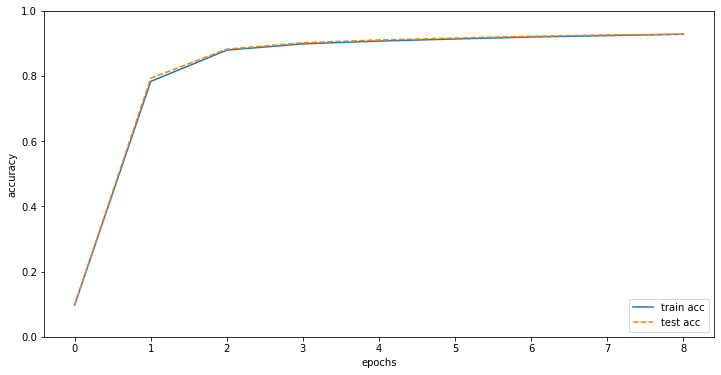

In [43]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

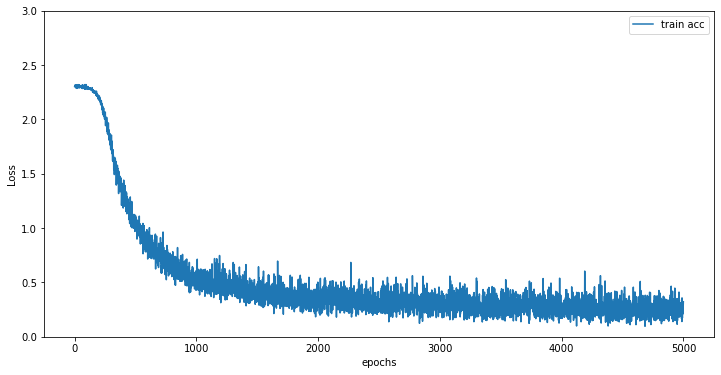

In [44]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()